# Convolutional neural network setup



In [1]:
## Start off with the required imports.

from tensorflow.keras import layers
from tensorflow.keras import models
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

#All machine learning imports.
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K

from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle



In [3]:
#Data importing
#dataset = pd.read_csv("C:\\Users\\maxhi\\OneDrive\\Desktop\\CNN\\Handwritten Data.csv").astype('float32')
dataset = pd.read_csv("C:\\Users\\20183382\\Desktop\\CNN\\Handwritten Data.csv").astype('float32')

dataset.rename(columns={'0':'label'}, inplace=True)

# The data is as follows:
# First row contains y-labels, with 0:A, 1:B etc. Up to 25.
# Axist 1 stands for collumns, 0 for Index
X = dataset.drop('label' ,axis = 1)
y = dataset['label']

In [4]:
#lets first inspect the data

print('data shape:', X.shape)    #where (rows, collumns)

print('collumns:',len(X.iloc[1]))

X.head()

data shape: (372450, 784)
collumns: 784


,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


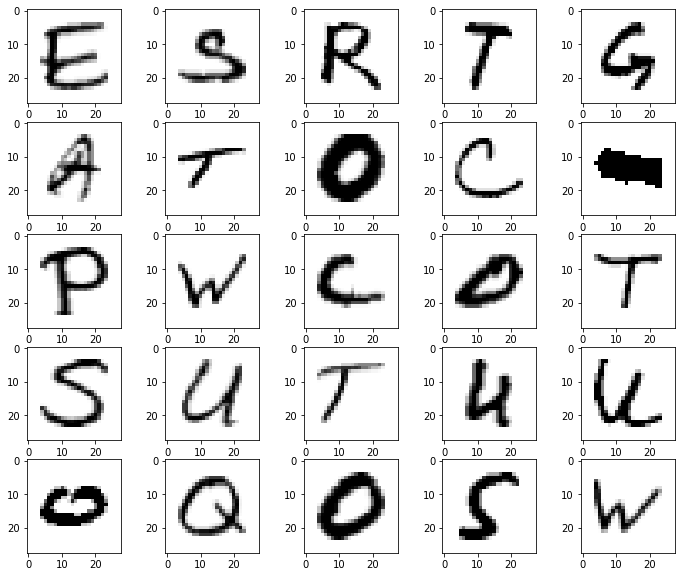

In [5]:
#Inspect the letters

X_shuffle = shuffle(X)

plt.figure(figsize = (12,10))
row, colums = 5, 5
for i in range(25):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

In [7]:
#Random copy to be safe
data_alphabet = dataset.copy()

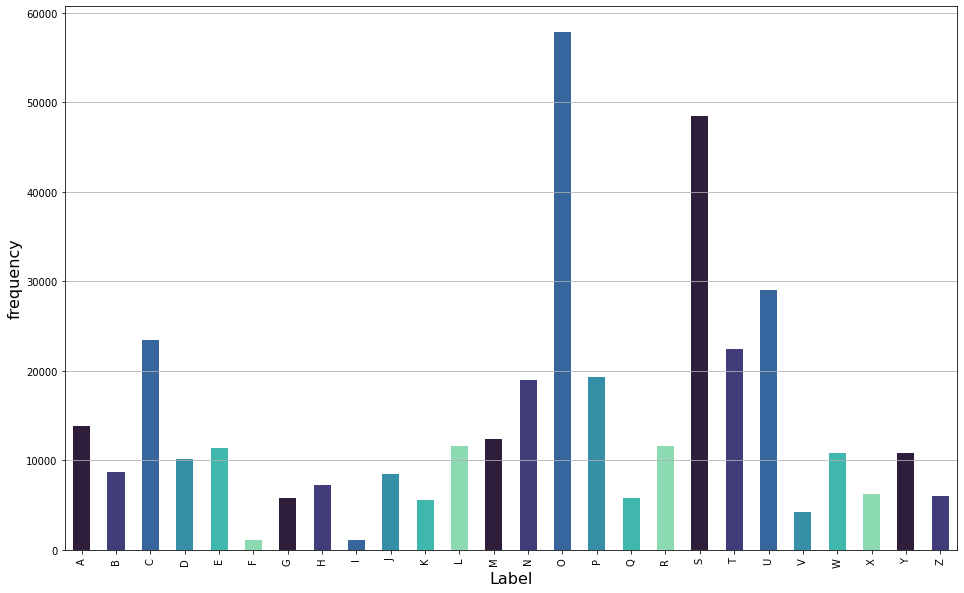

In [42]:
#Building the labels

alphabet_keys = {0:'A',1:'B',2:'C', 3:'D',4:'E',5:'F',6:'G', 7:'H',8:'I',9:'J', 
             10:'K', 11:'L', 12:'M', 13:'N', 14:'O', 15:'P', 16:'Q', 17:'R', 18:'S',
            19:'T', 20:'U', 21:'V', 22:'W', 23:'X', 24:'Y', 25:'Z'}
visual_data = dataset.copy()
visual_data['label'] = visual_data['label'].map(alphabet_keys)

my_color = ['lightcoral','paleturquoise','thistle']
palette = sns.color_palette("mako")

label_freq = visual_data.groupby('label').size()
label_freq.plot.bar(figsize=(16,10), color= palette)
plt.ylabel("frequency", fontsize=16)
plt.xlabel('Label', fontsize=16)

plt.grid(axis='y')
plt.show()





In [9]:
#check out the labels with high and low values, or atleast get a table with size
print(label_freq)


label
A    13869
B     8668
C    23409
D    10134
E    11440
F     1163
G     5762
H     7218
I     1120
J     8493
K     5603
L    11586
M    12336
N    19010
O    57825
P    19341
Q     5812
R    11566
S    48419
T    22495
U    29008
V     4182
W    10784
X     6272
Y    10859
Z     6076
dtype: int64


In [16]:
#splitting the data, into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y)

# scale data to 0 and 1. 
standard_scaler = MinMaxScaler()
standard_scaler.fit(X_train)



X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

In [13]:
#clearly see that the value are between 0,1
#print(X_train)


In [17]:
#This looks good according the the input shape.
print(X_train.shape)
print(y_train.shape)

(279337, 784)
(279337,)


In [15]:
#Making the training set smaller
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, test_size=0.3, random_state=42)
standard_scaler = MinMaxScaler()
standard_scaler.fit(X_train)


X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)


In [16]:
#double checking if it scaled good again.
print(X_train.shape)
print(y_train.shape)

(74490, 784)
(74490,)


In [17]:
#Creating the SVM model
#1ST model SVM linear kernel
from sklearn.svm import SVC
linear_svm_model = SVC(kernel='linear')
linear_svm_model.fit(X_train, y_train)

y_predictions1 = linear_svm_model.predict(X_test)



In [41]:
#Prediction on test y, real world data
from sklearn.metrics import mean_squared_error
print(y_predictions1)

err =  mean_squared_error(y_test, y_preddictions1)

print("Score:",err)

[12. 18.  2. ... 18. 15. 11.]


NameError: name 'y_preddictions1' is not defined

In [19]:
#Displaying the results
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# accuracy

# cm

print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_predictions1), "\n")


accuracy: 0.9109947643979057 



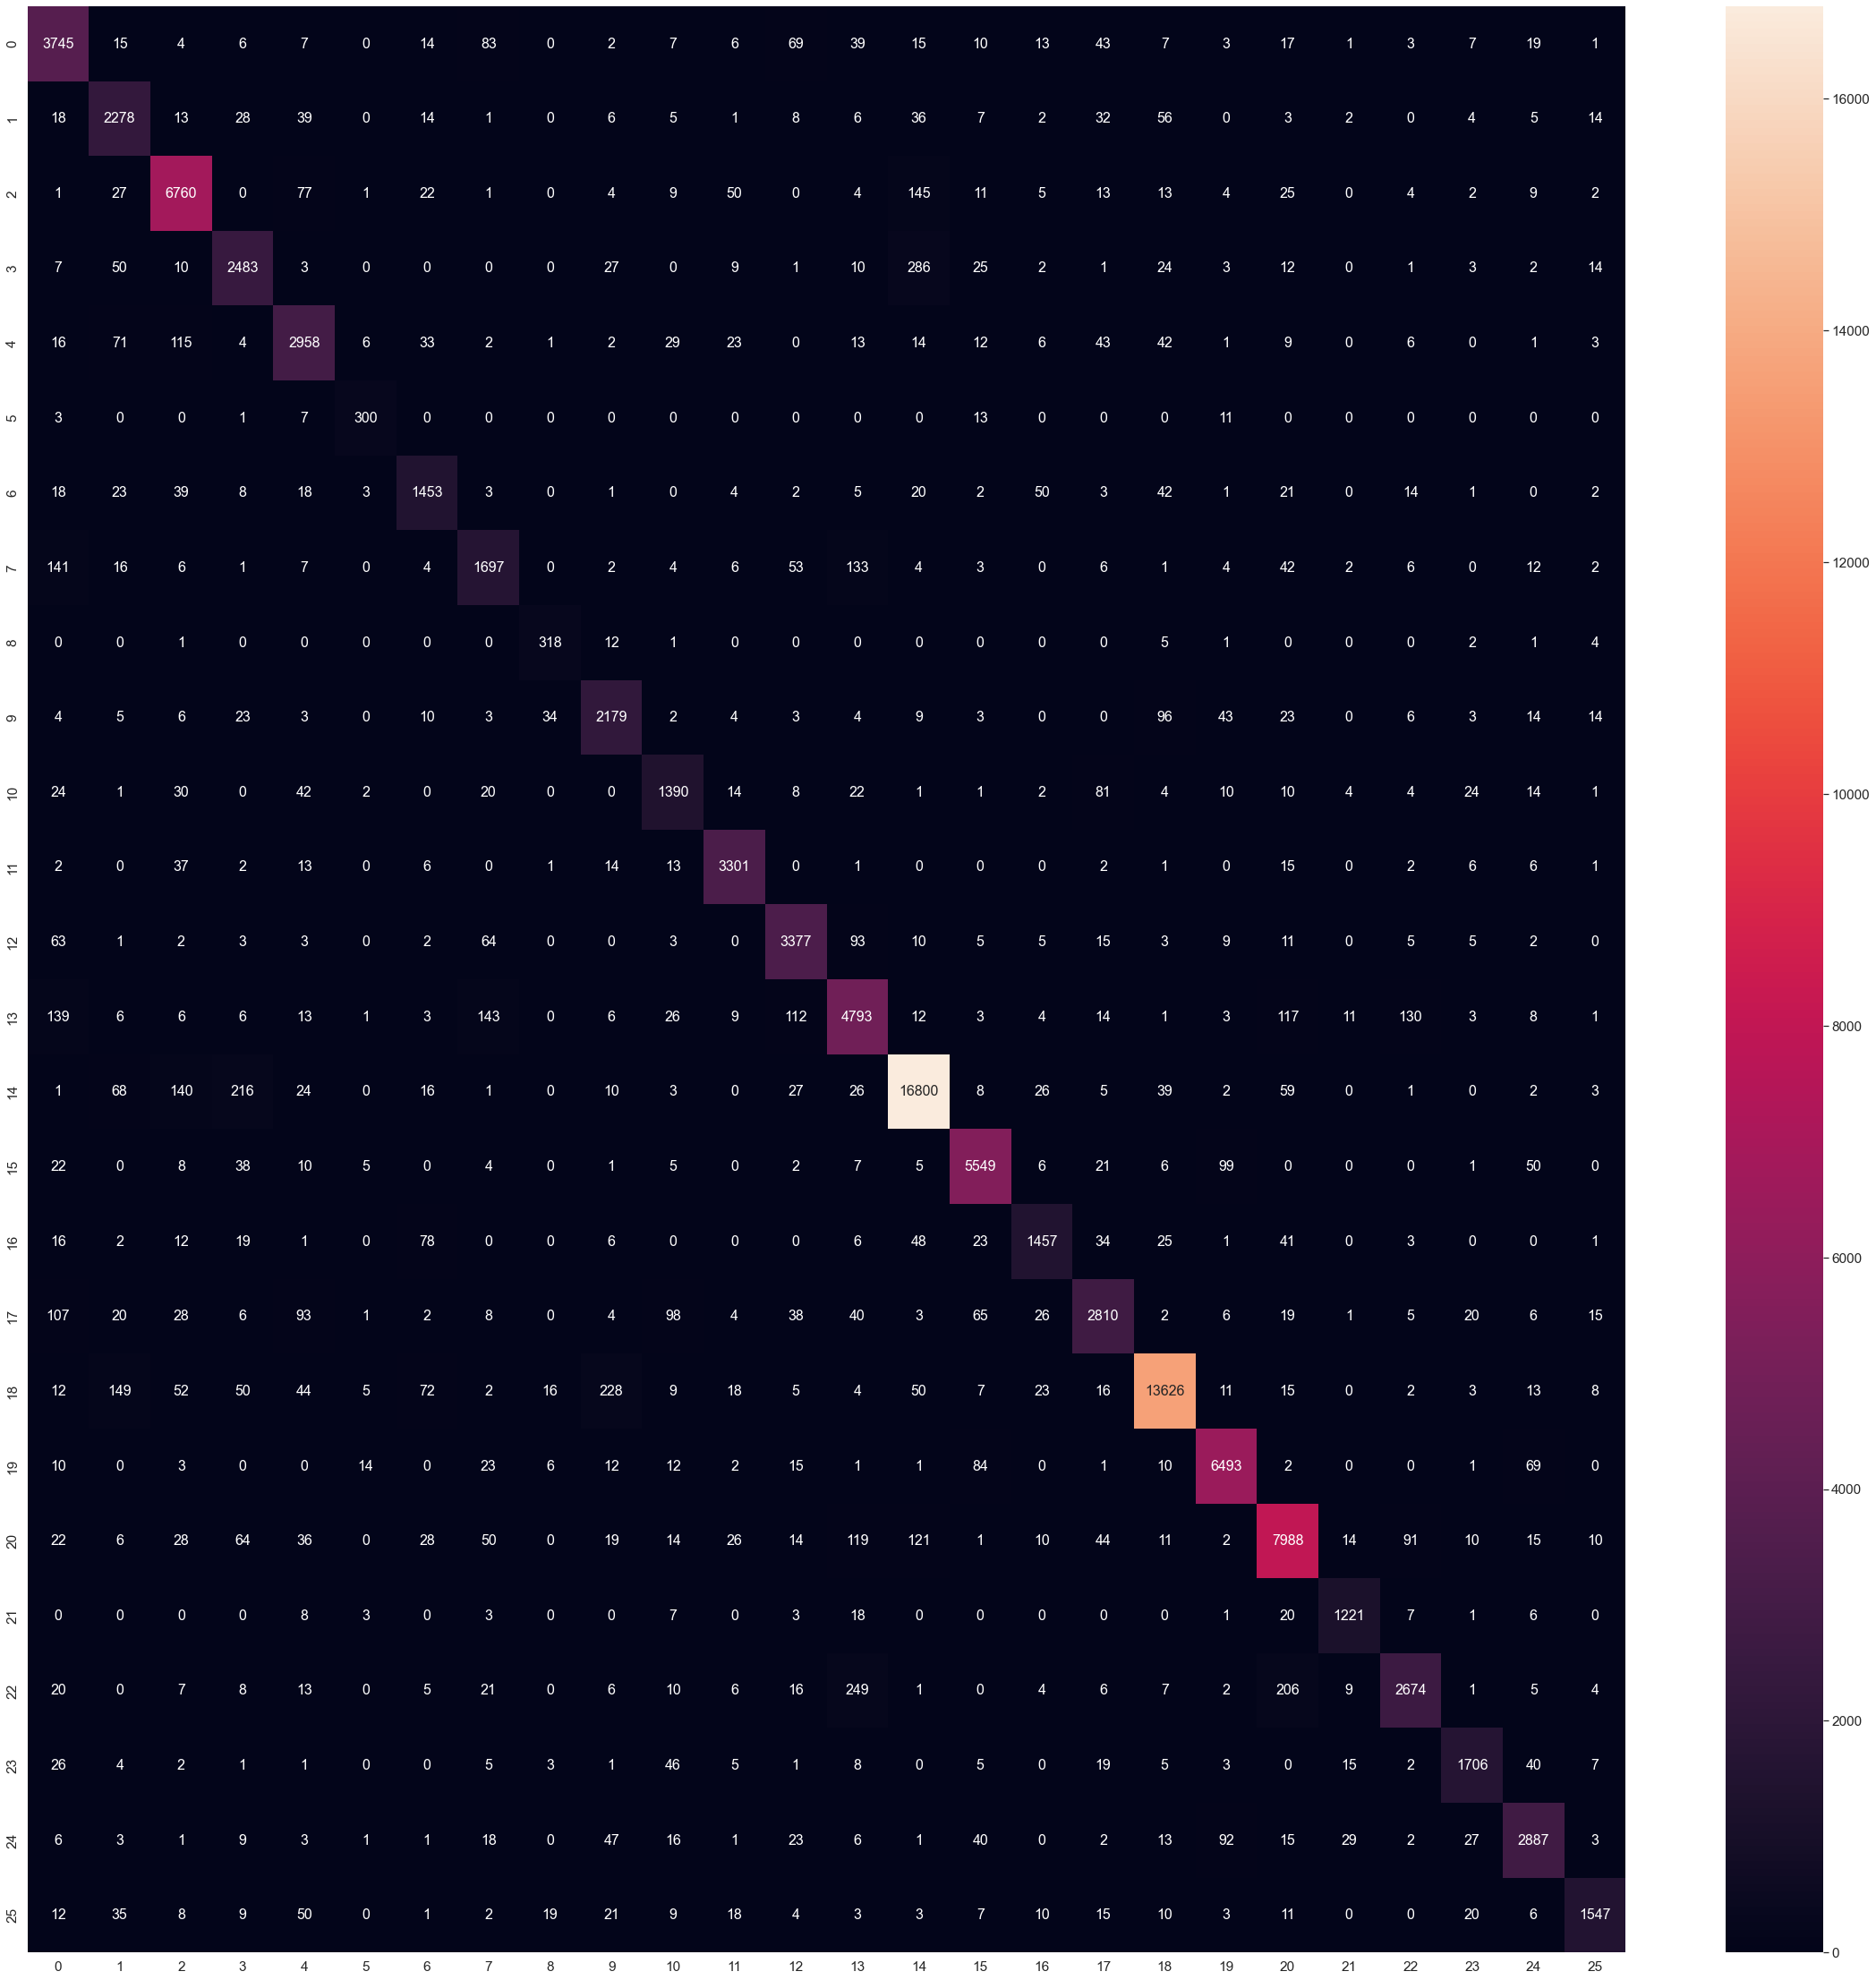

In [32]:
#Confusion matrix
cm1= confusion_matrix(y_test, y_predictions1)
#print(metrics.confusion_matrix(y_true=y_test, y_pred=y_predictions1))
 #annot=True to annotate cells, ftm='g' to disable scientific notation
plt.figure(figsize=(40,40))

df_cm = pd.DataFrame(cm1, range(26),
                  range(26))
#plt.figure(figsize = (20,15))

sns.heatmap(cm1, annot=True, fmt='g',annot_kws={"size": 16}); 
sns.set(font_scale=1.4)#for label size
#sns.title("Confusion matrix")
#sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})# font size
plt.show()

In [4]:
#splitting again but with smaller test size, RBF kernel
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, test_size=0.3, random_state=42)
standard_scaler = MinMaxScaler()
standard_scaler.fit(X_train)



X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)


In [31]:
print(X_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [1]:
#Creating a rbg kernel SVM model
from sklearn.svm import SVC
rbf_model = SVC(kernel='rbf')
rbf_model.fit(X_train, y_train)




In [9]:
#Accuracy rbf
y_predictions = rbf_model.predict(X_test)
#print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_predictions), "\n")

In [8]:
from sklearn import metrics

print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_predictions), "\n")


accuracy: 0.9631270416610731 



In [62]:
print(y_test.shape)
cm= confusion_matrix(y_test, y_predictions)
#print(cm)
# labels, title and ticks

(111735,)


<Figure size 1080x1440 with 0 Axes>

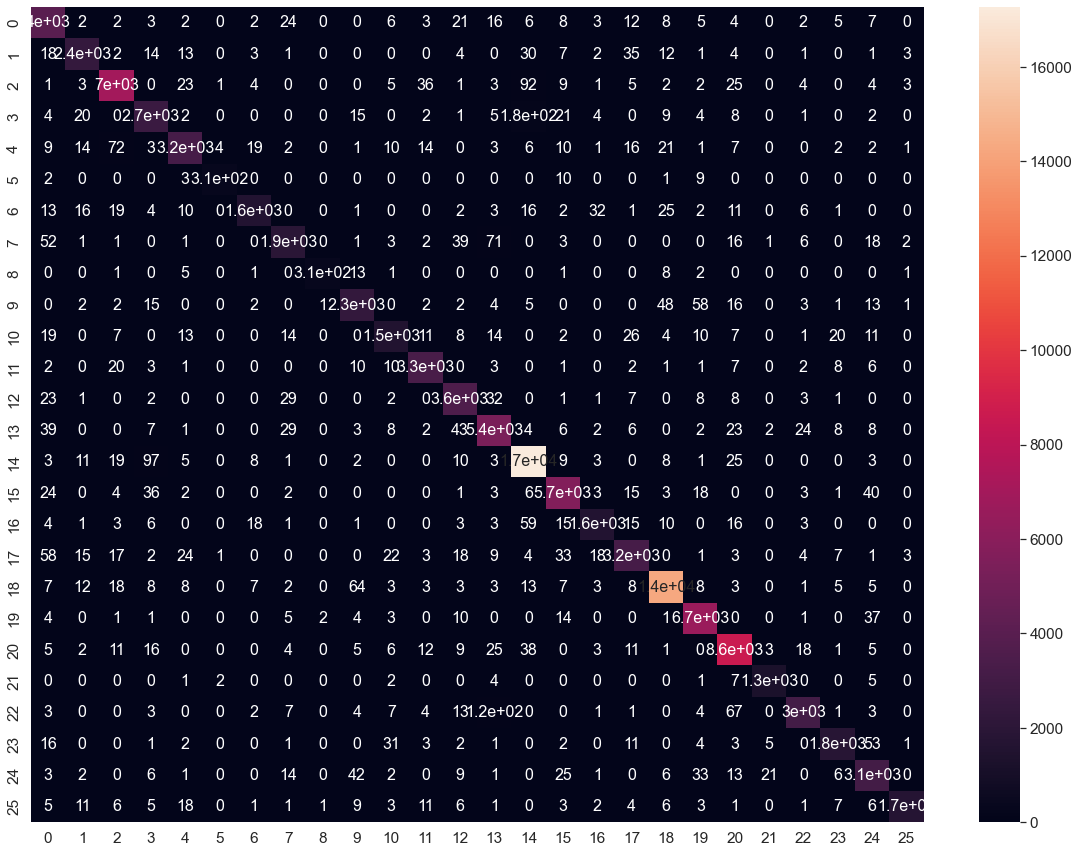

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt     
from matplotlib.ticker import MultipleLocator

#ax= plt.subplot()
plt.figure(figsize=(15,20))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation


df_cm = pd.DataFrame(cm, range(26),
                  range(26))
plt.figure(figsize = (20,15))
sns.set(font_scale=1.4)#for label size
#sns.title("Confusion matrix")
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})# font size
plt.show()

#ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
#ax.set_title('Confusion Matrix'); 
# locator = MultipleLocator(5)
# ax.xaxis.set_major_locator(locator)
#ax.xaxis.set_ticklabels(['business', 'A']); ax.yaxis.set_ticklabels(['health', 'business']);


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt     


# ax= plt.subplot()
# #plt.figure(figsize = (30,20))
# #sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# df_cm = pd.DataFrame(cm, range(26),
#                   range(26))
# #plt.figure(figsize = (20,15))
# sns.set(font_scale=1.4)#for label size
# #sns.title("Confusion matrix")
# sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
# ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
# ax.set_title('Confusion Matrix'); 
# ax.set_xticks(df_cm)
# ax.set_yticks(df_cm)
# labels = ['a', 'b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
# ax.xaxis.set_ticklabels(labels); 
# #ax.yaxis.set_ticklabels(labels);


# df_cm = pd.DataFrame(cm, range(26),
#                   range(26))
# plt.figure(figsize = (20,15))
# sns.set(font_scale=1.4)#for label size
# sns.title("Confusion matrix")
# sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

In [33]:
#results for the rbf
# from sklearn.metrics import confusion_matrix
# from sklearn import metrics

from sklearn.svm import SVC
linear_svm_model = SVC(kernel='poly')
linear_svm_model.fit(X_train, y_train)

y_predictions3 = linear_svm_model.predict(X_test)

print(y_predictions3)
#matrix


[12. 18.  2. ... 18. 15. 11.]


In [37]:
#accuracy for the poly kernel
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_predictions3), "\n")

accuracy: 0.9529690786235289 



In [44]:
from sklearn.metrics import mean_squared_error
print(y_predictions3)

err =  mean_squared_error(y_test, y_predictions3)

print("Score:",err)

[12. 18.  2. ... 18. 15. 11.]
Score: 5.000546


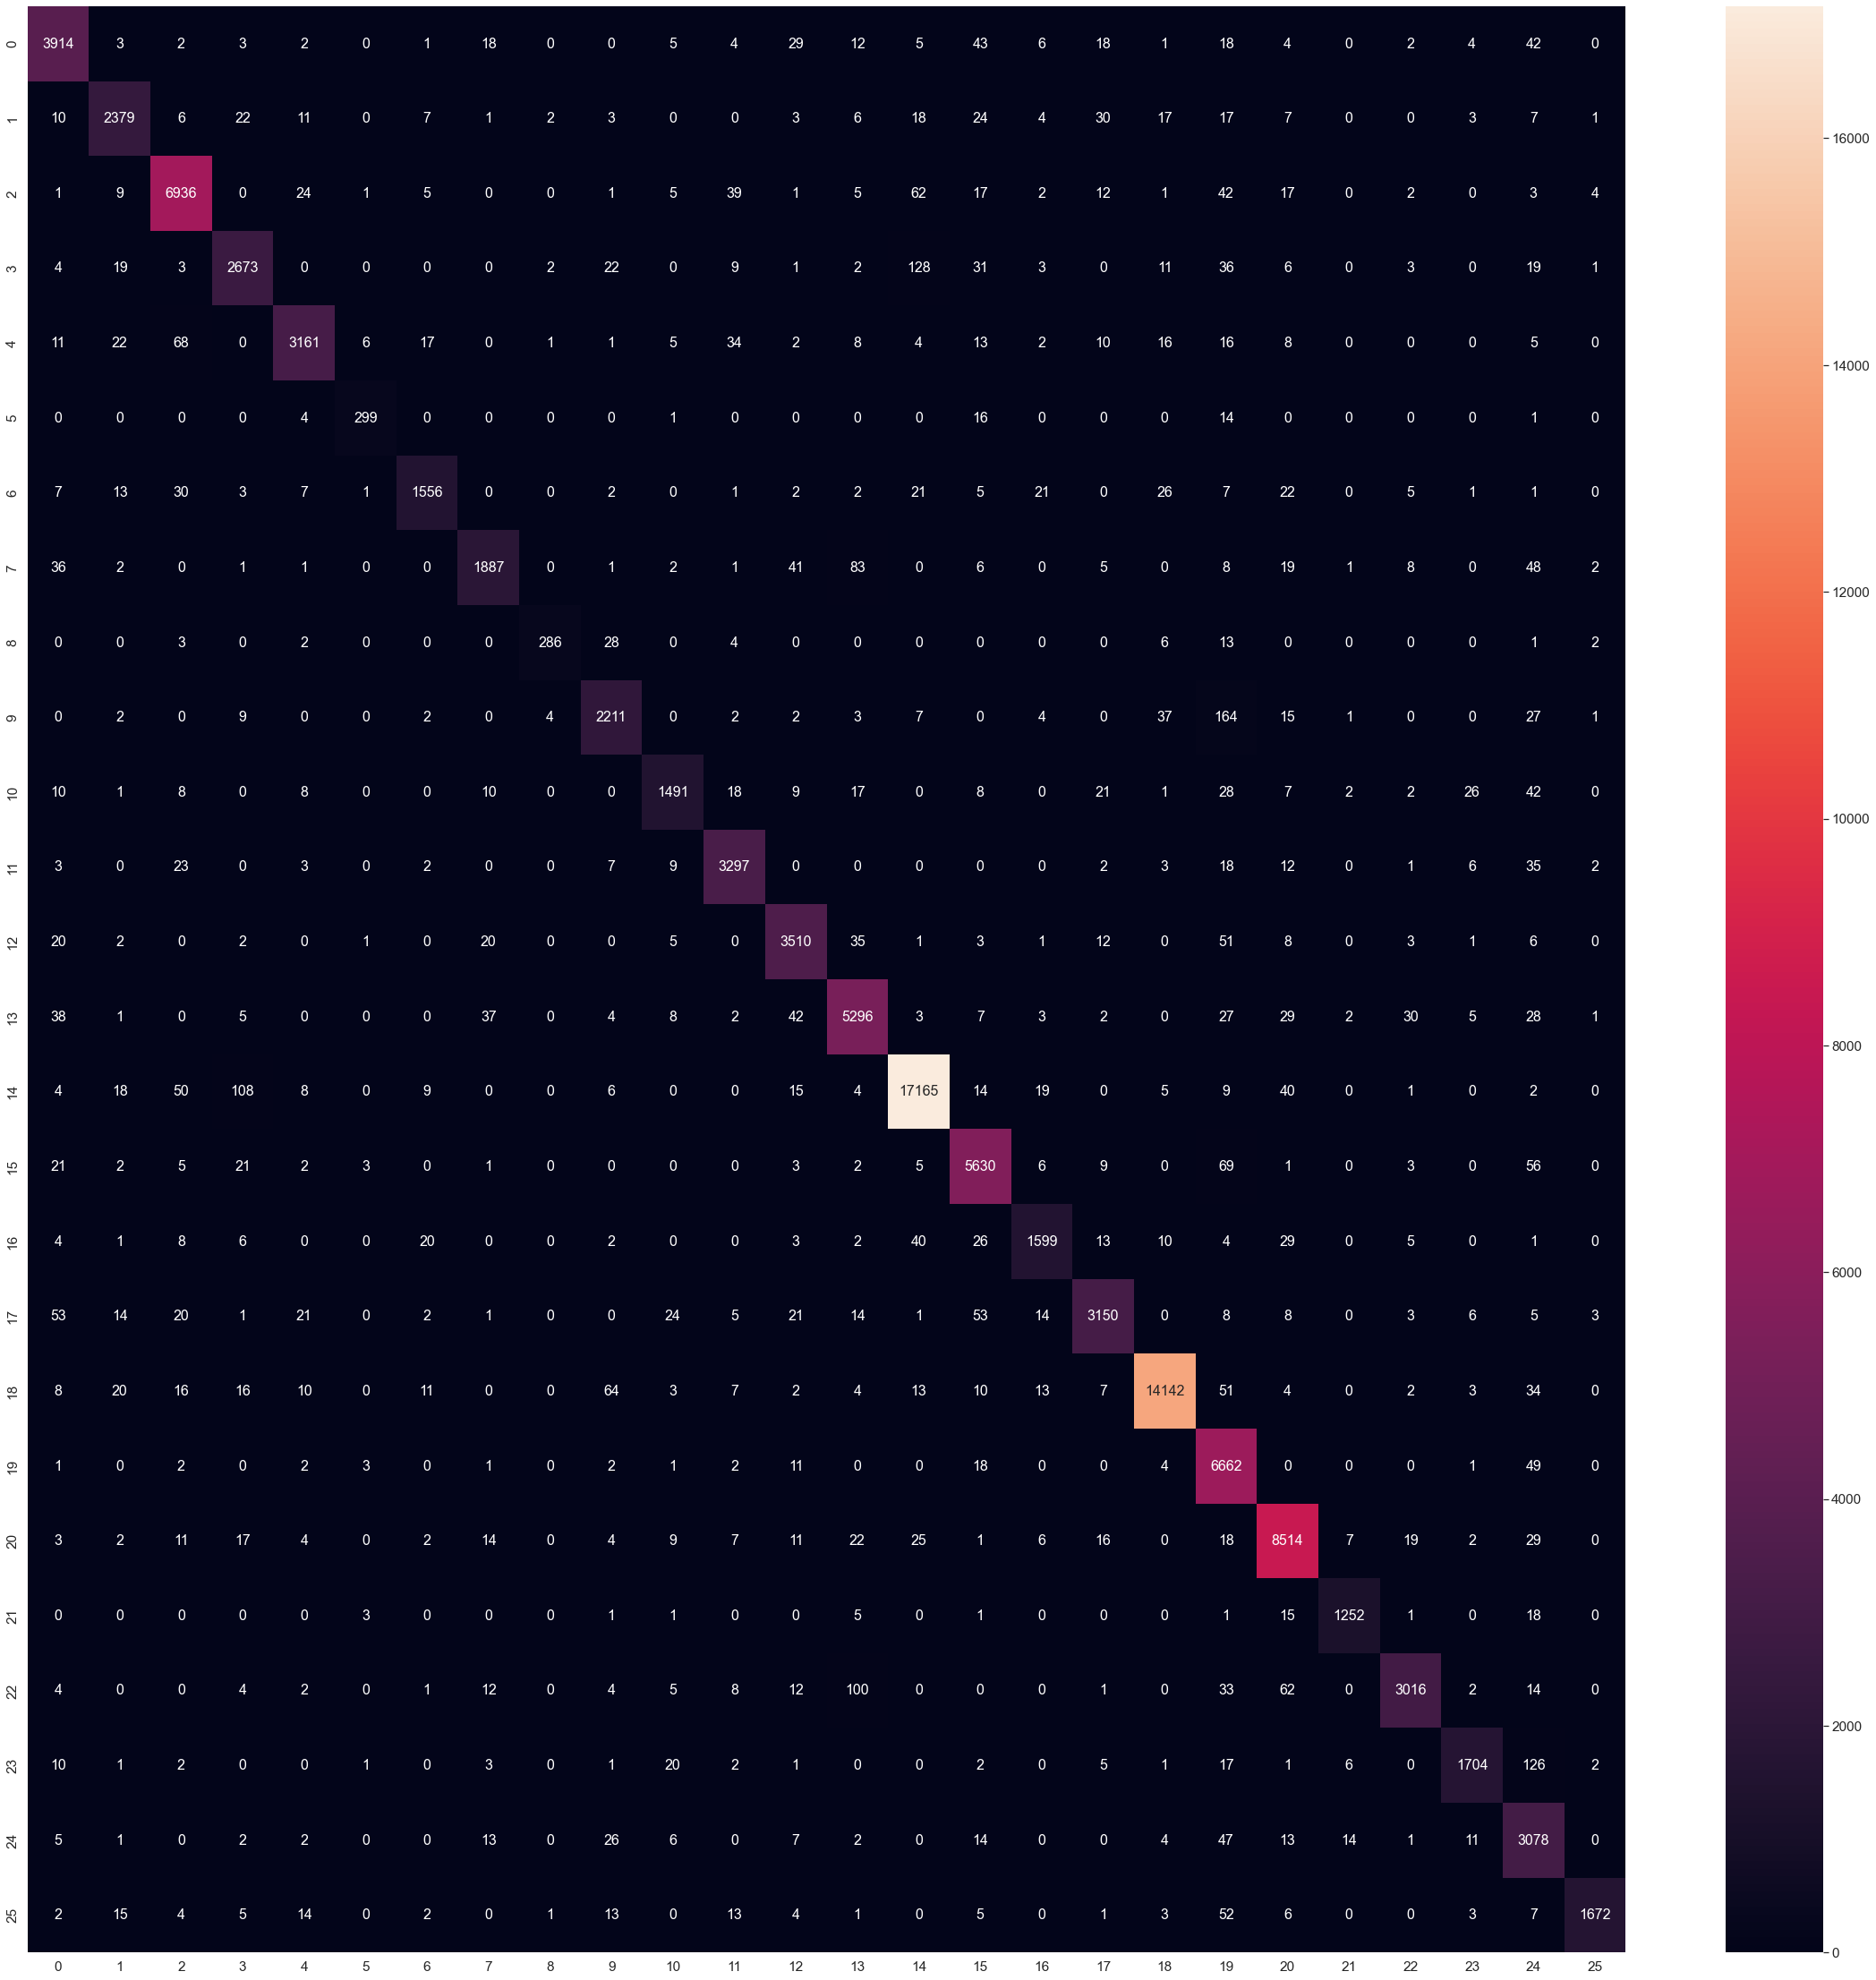

In [38]:
cm3= confusion_matrix(y_test, y_predictions3)
#print(metrics.confusion_matrix(y_true=y_test, y_pred=y_predictions1))
 #annot=True to annotate cells, ftm='g' to disable scientific notation
plt.figure(figsize=(40,40))

df_cm = pd.DataFrame(cm3, range(26),
                  range(26))
#plt.figure(figsize = (20,15))

sns.heatmap(cm3, annot=True, fmt='g',annot_kws={"size": 16}); 
sns.set(font_scale=1.4)#for label size
#sns.title("Confusion matrix")
#sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})# font size
plt.show()

Data after scaler


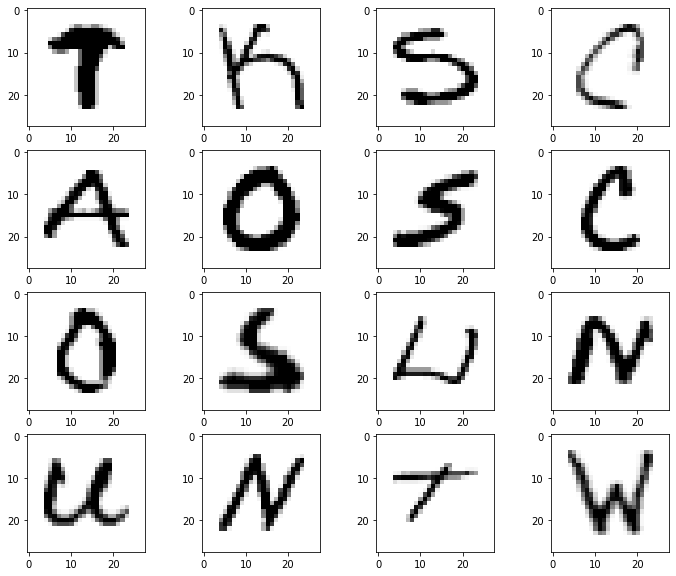

In [19]:
print("Data after scaler")
X_shuffle = shuffle(X_train)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle[i].reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()
#Looks much more fitted to the screen.

In [20]:
#Reshaping the data to the required input shape of the CCN, 28 X 28 X 1

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


In [21]:
print(X_train) #Looks about right




[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

In [22]:
cnn = models.Sequential()
cnn.add(Conv2D(28, (5, 5), input_shape=(28, 28, 1), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(56, (5, 5), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(56, (5, 5), activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dense(len(y.unique()), activation='softmax'))
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=18, batch_size=200, verbose=2)

scores = cnn.evaluate(X_test,y_test, verbose=0)
print("CNN Score:",scores[1])

Epoch 1/18
1397/1397 - 73s - loss: 0.2321 - accuracy: 0.9355 - val_loss: 0.0929 - val_accuracy: 0.9741 - 73s/epoch - 52ms/step
Epoch 2/18
1397/1397 - 79s - loss: 0.0882 - accuracy: 0.9749 - val_loss: 0.0717 - val_accuracy: 0.9806 - 79s/epoch - 57ms/step
Epoch 3/18
1397/1397 - 78s - loss: 0.0670 - accuracy: 0.9807 - val_loss: 0.0585 - val_accuracy: 0.9846 - 78s/epoch - 56ms/step
Epoch 4/18
1397/1397 - 70s - loss: 0.0553 - accuracy: 0.9838 - val_loss: 0.0576 - val_accuracy: 0.9844 - 70s/epoch - 50ms/step
Epoch 5/18
1397/1397 - 69s - loss: 0.0459 - accuracy: 0.9863 - val_loss: 0.0494 - val_accuracy: 0.9872 - 69s/epoch - 50ms/step
Epoch 6/18
1397/1397 - 68s - loss: 0.0393 - accuracy: 0.9880 - val_loss: 0.0444 - val_accuracy: 0.9878 - 68s/epoch - 49ms/step
Epoch 7/18
1397/1397 - 68s - loss: 0.0332 - accuracy: 0.9895 - val_loss: 0.0409 - val_accuracy: 0.9894 - 68s/epoch - 49ms/step
Epoch 8/18
1397/1397 - 73s - loss: 0.0295 - accuracy: 0.9905 - val_loss: 0.0398 - val_accuracy: 0.9896 - 73s/ep

In [ ]:
# cnn = models.Sequential()
# cnn.add(Conv2D(28, (3, 3), input_shape=(28, 28, 1), activation='relu'))
# cnn.add(MaxPooling2D(pool_size=(2, 2)))
# cnn.add(Dropout(0.3))
# cnn.add(Flatten())
# cnn.add(Dense(128, activation='relu'))
# cnn.add(Dense(len(y.unique()), activation='softmax'))

# cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# history = cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=18, batch_size=200, verbose=2)

# scores = cnn.evaluate(X_test,y_test, verbose=0)
# print("CNN Score:",scores[1])

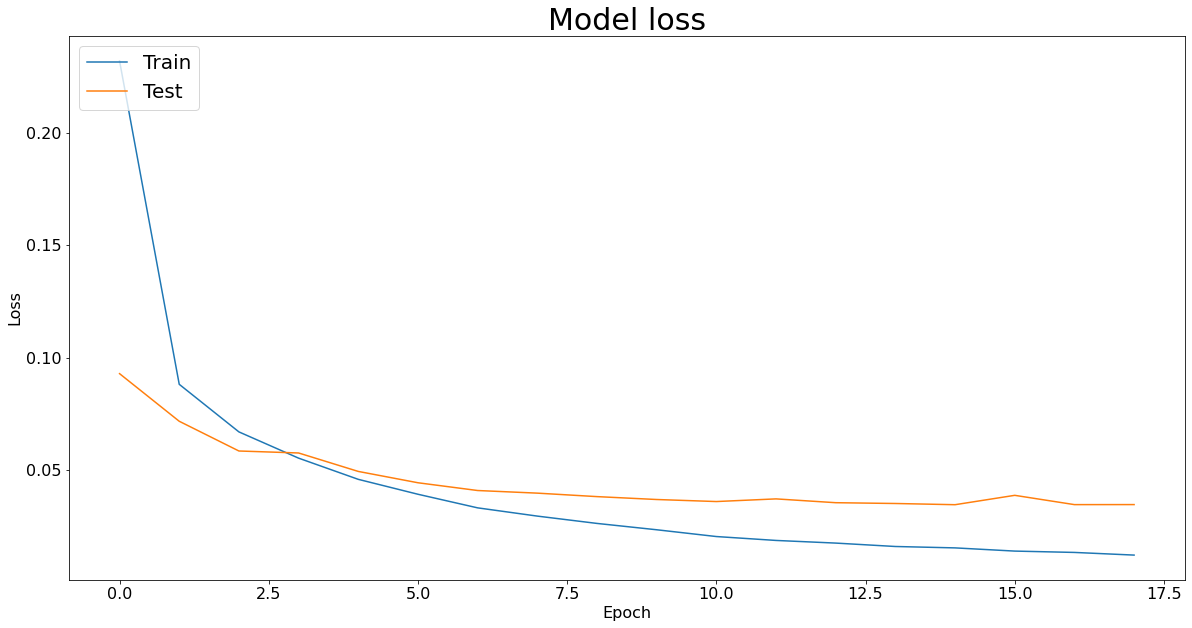

In [48]:
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss',fontsize=30)
plt.ylabel('Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.legend(['Train', 'Test'], loc='upper left', fontsize=20)


plt.show()


In [30]:
cm=confusion_matrix(y_test,y_predictions)
df_cm = pd.DataFrame(cm, range(26),
                  range(26))
plt.figure(figsize = (20,15))
sns.set(font_scale=1.4)#for label size
sns.title("Confusion matrix")
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
plt.show()

AttributeError: module 'seaborn' has no attribute 'title'

<Figure size 1440x1080 with 0 Axes>

In [ ]:
#Saving the model and extracting it
!pip install --upgrade pip


cnn.save('cnn_model.h5')

output_labels = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']


In [ ]:
#Start of the neural network model.
#model = models.Sequential()
#model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))